# Métodos basados en datos - Bivariados

En los métodos bivariados cada mapa factor (geología, pendiente, coberturas, etc) es combinado con el inventario de movimientos en masa, para obtener los pesos de las clases que conforman las variables, basados generalmente en densidad de movimientos en masa. Los métodos estadísticos bivariados son una buena herramienta de aprendizaje para el analista encontrar qué factores o combinación de factores juegan un papel importante en la ocurrencia de movimientos en masa.

# Settings

In [1]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 81.7 MB/s 


In [2]:
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Variables

(1389506,)

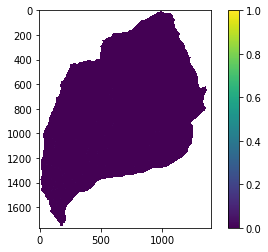

In [3]:
# Inventario

raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller4_InventarioMenM/AOI_MenM.tif?raw=true')
inventario=raster.read(1)

inventario=np.where(inventario<0,0,1)

# Mask
raster_mask = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_SLOPE_Degree.tif?raw=true');
msk=raster_mask.read_masks(1);
msk=np.where(msk == 255, 1, np.nan);
inventario = msk * inventario;

inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

(1389506,)

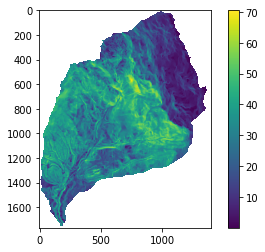

In [4]:
# Slope.

# Import Raster.
raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_SLOPE_Degree.tif?raw=true');
pendiente = raster.read(1);

# nan limits.
lowerSlopeLimit = 0;
upperSlpoeLimit = 90;

# Reclasify nan.
pendiente = np.where(pendiente < lowerSlopeLimit, np.nan, pendiente);
pendiente = np.where(pendiente > upperSlpoeLimit, np.nan, pendiente);

# Render info.
plt.imshow(pendiente)
plt.colorbar();

# Vector
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
pendiente_vector_MenM.shape # otra forma de saber las dimensiones

[0.0000000e+00 6.7693852e-03 6.9500757e-03 ... 3.5999222e+02 3.5999310e+02
           nan]


(1389506,)

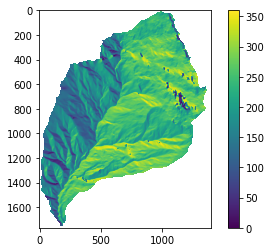

In [5]:
# Aspect.

# Import Raster.
raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_ASPECT_2m.tif?raw=true');
aspecto=raster.read(1);

# nan limits.
lowerAspectLimit = -1;
upperAspectLimit = 360;

# Reclasify nan.
aspecto=np.where(aspecto < lowerAspectLimit, np.nan, aspecto);
aspecto=np.where(aspecto > upperAspectLimit, np.nan, aspecto);

# Render info.
print(np.unique(aspecto));
plt.imshow(aspecto);
plt.colorbar();

# Vector
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
aspecto_vector_MenM.shape

(1768, 1394)
[ 1.  2.  3. nan]
(1389506,)


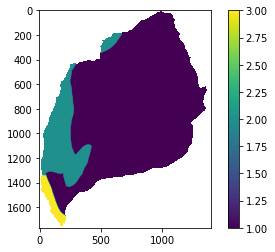

In [6]:
# Geology.

# Import Raster.
raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_GEO.tif?raw=true');
geologia = raster.read(1);
print(np.shape(geologia));

# Mask
raster_mask = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_SLOPE_Degree.tif?raw=true');
msk=raster_mask.read_masks(1);
msk=np.where(msk == 255, 1, np.nan);
geologia = msk * geologia;

# nan limits.
lowerGeologyLimit = 1;
upperGeologyLimit = 3;

# Reclasify nan.
geologia = np.where(geologia < lowerGeologyLimit, np.nan, geologia);
geologia = np.where(geologia > upperGeologyLimit, np.nan, geologia);

# Render info.
print(np.unique(geologia));
plt.imshow(geologia);
plt.colorbar();

# Vector
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
print(geologia_vector_MenM.shape)

# Transformacion

In [12]:
pendiente_serie=pd.Series(pendiente_vector_MenM)
ap=bp=cp=dp=ep=0
for row in pendiente_serie:
        if (0 <= row) & (row < 10):
          ap+=1
        elif (10 <= row) & (row < 20):
          bp+=1
        elif (20 <= row) & (row < 30):
          cp+=1
        elif (30 <= row) & (row < 35):
          dp+=1
        if (row>=35):
          ep+=1

totalp=ap+bp+cp+dp+ep
print("total:", totalp,ap,bp,cp,dp,ep)

pendienteconMenM=pendiente_vector_MenM*inventario_vector_MenM
ap1=bp1=cp1=dp1=ep1=0
for row in pendienteconMenM:
        if (0 < row) & (row < 10):
          ap1+=1
        elif (10 <= row) & (row < 20):
          bp1+=1
        elif (20 <= row) & (row < 30):
          cp1+=1
        elif (30 <= row) & (row < 35):
          dp1+=1
        if (row>=35):
          ep1+=1

total1p=ap1+bp1+cp1+dp1+ep1
print("total1:", total1p,ap1,bp1,cp1,dp1,ep1)

total: 1389506 203260 233649 252145 157254 543198
total1: 69 0 1 22 23 23


In [13]:
# Frequency ratio.

w_a=(ap1/total1p)/(ap/totalp)
w_b=(bp1/total1p)/(bp/totalp)
w_c=(cp1/total1p)/(cp/totalp)
w_d=(dp1/total1p)/(dp/totalp)
w_e=(ep1/total1p)/(ep/totalp)
print(w_a,w_b,w_c,w_d,w_e)

0.0 0.08618812028274048 1.757048121321956 2.945353801281154 0.8526700515588544


[0.         0.08618812 0.8526701  1.7570481  2.9453537         nan]


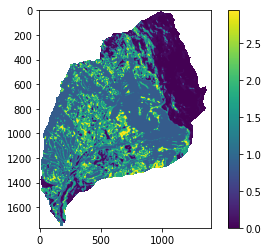

In [15]:
# Reclasify by Frequenncy ratio.

pendiente_c=np.where ( (np.logical_and (pendiente>=0, pendiente<10 )),w_a,pendiente_c )
pendiente_c=np.where ( (np.logical_and (pendiente_c>=10, pendiente_c<20 )),w_b,pendiente_c )
pendiente_c=np.where ( (np.logical_and (pendiente_c>=20, pendiente_c<30 )),w_c,pendiente_c )
pendiente_c=np.where ( (np.logical_and (pendiente_c>=30, pendiente_c<35 )),w_d,pendiente_c )
pendiente_c=np.where ( pendiente_c>=35,w_e,pendiente_c )

plt.imshow(pendiente_c)
plt.colorbar()
print(np.unique(pendiente_c));

total: 1389506 56628 315573 711677 305628
total1: 69 3 29 27 10
w: 1.0668451004419384 1.850586949334445 0.7639979079419945 0.6588980105206993
[0.658898  0.7639979 1.066845  1.8505869       nan]


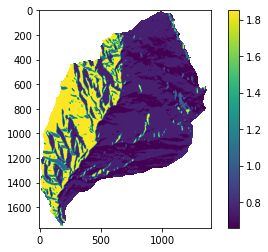

In [17]:
# Aspect

aspecto_serie=pd.Series(aspecto_vector_MenM)
aa=ba=ca=da=0
for row in aspecto_serie:
        if (0 <= row) & (row < 90):
          aa+=1
        elif (90 <= row) & (row < 180):
          ba+=1
        elif (180 <= row) & (row < 270):
          ca+=1
        if (row>=270):
          da+=1

totala=aa+ba+ca+da
print("total:", totala,aa,ba,ca,da)

aspectoconMenM=aspecto_vector_MenM*inventario_vector_MenM
aa1=ba1=ca1=da1=0
for row in aspectoconMenM:
        if (0 < row) & (row < 90):
          aa1+=1
        elif (90 <= row) & (row < 180):
          ba1+=1
        elif (180 <= row) & (row < 270):
          ca1+=1
        if (row>=270):
          da1+=1

total1a=aa1+ba1+ca1+da1
print("total1:", total1a,aa1,ba1,ca1,da1)

w_a=(aa1/total1a)/(aa/totala)
w_b=(ba1/total1a)/(ba/totala)
w_c=(ca1/total1a)/(ca/totala)
w_d=(da1/total1a)/(da/totala)
print("w:", w_a,w_b,w_c,w_d)

aspecto_c=np.where ( (np.logical_and (aspecto>=0, aspecto<90 )),w_a,aspecto )
aspecto_c=np.where ( (np.logical_and (aspecto_c>=90, aspecto_c<180 )),w_b,aspecto_c )
aspecto_c=np.where ( (np.logical_and (aspecto_c>=180, aspecto_c<270 )),w_c,aspecto_c )
aspecto_c=np.where ( aspecto_c>=270,w_d,aspecto_c )

plt.imshow(aspecto_c)
plt.colorbar()
print(np.unique(aspecto_c));

total 208276 208276 0 0
total1 23 23 0 0
w: 1.0 nan nan


<ipython-input-20-991bf2dcc870>:19: RuntimeWarning: invalid value encountered in double_scalars
  w_b=(bg1/totalg1)/(bg/totalg)
<ipython-input-20-991bf2dcc870>:20: RuntimeWarning: invalid value encountered in double_scalars
  w_c=(cg1/totalg1)/(cg/totalg)


[ 1.  3. nan]


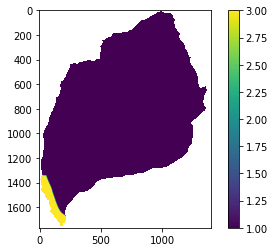

In [20]:
# Geologia

ag=(geologia == 2).sum()
bg=(geologia == 4).sum()
cg=(geologia == 6).sum()

totalg=ag+bg+cg
print("total", totalg,ag,bg,cg)

geologiaconMenM=geologia*inventario
ag1=(geologiaconMenM == 2).sum()
bg1=(geologiaconMenM == 4).sum()
cg1=(geologiaconMenM == 6).sum()

totalg1=ag1+bg1+cg1
print("total1", totalg1,ag1,bg1,cg1)

w_a=(ag1/totalg1)/(ag/totalg)
w_b=(bg1/totalg1)/(bg/totalg)
w_c=(cg1/totalg1)/(cg/totalg)
print("w:", w_a,w_b,w_c)

geologia_c=np.where ( geologia==2,w_a,geologia )
geologia_c=np.where ( geologia_c==4,w_b,geologia_c )
geologia_c=np.where ( geologia_c==6,w_c,geologia_c )

plt.imshow(geologia_c)
plt.colorbar()
print(np.unique(geologia_c));

# Mapa de Suceptibilidad

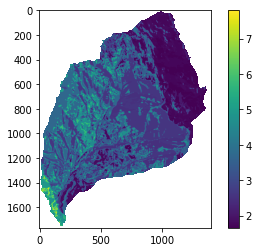

In [21]:
IS=pendiente_c+aspecto_c+geologia_c
plt.imshow(IS);
plt.colorbar();

In [23]:
meta = raster.profile;
raster_transform = meta['transform'];
raster_crs = meta['crs'];

with rio.open('IS.TIF', 'w', driver = 'Gtiff', height = aspecto.shape[0], width = aspecto.shape[1], count = 1, dtype = 'float64', nodata = -999, crs = raster_crs, transform = raster_transform) as dst: dst.write(IS, 1);